In [ ]:
import scipy.io


In [ ]:
# Replace 'your_file.mat' with the actual filename you uploaded
df= scipy.io.loadmat('/content/PIE (1).mat')
print(df)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sat Mar 11 21:48:28 2017', '__version__': '1.0', '__globals__': [], 'Data': array([[-0.0026154 ,  0.00254127,  0.00322272, ...,  0.0095995 ,
        -0.01907508, -0.04813146],
       [-0.02212998, -0.02186943, -0.02197213, ...,  0.04637691,
         0.02977328,  0.00384552],
       [-0.02404873, -0.02396265, -0.02415822, ...,  0.04346427,
         0.02546816, -0.00031294],
       ...,
       [ 0.00672813,  0.0041077 ,  0.00194187, ..., -0.04814459,
        -0.04895955, -0.04709952],
       [ 0.03261104,  0.03103275,  0.03024916, ..., -0.03374141,
        -0.03295125, -0.0318069 ],
       [ 0.0370798 ,  0.03738524,  0.03806475, ..., -0.02015413,
        -0.01979568, -0.01919348]]), 'Label': array([[ 1],
       [ 1],
       [ 1],
       ...,
       [67],
       [67],
       [67]], dtype=uint8), 'n_per': array([[67]], dtype=uint8), 'n_sub': array([[21]], dtype=uint8)}


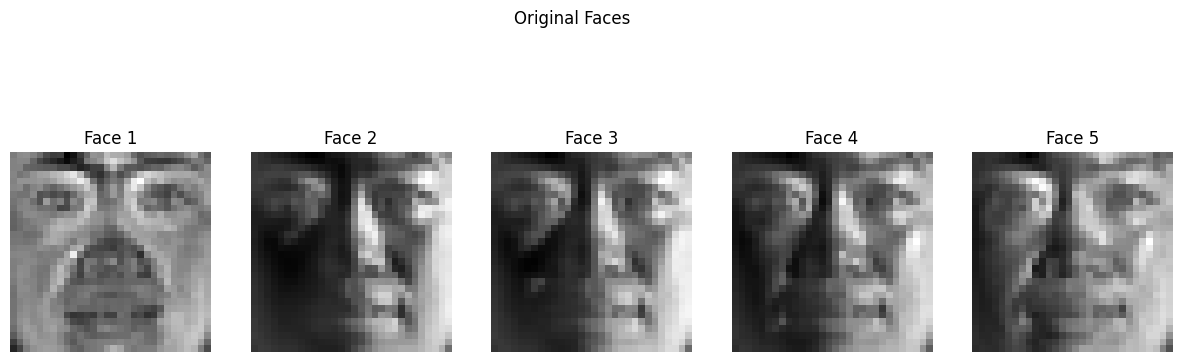

Hi


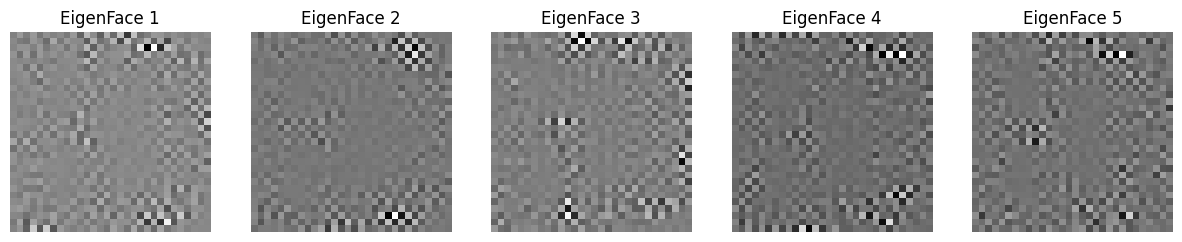

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from scipy.sparse import issparse
from scipy.sparse.linalg import svds


def PCA(data, options=None):
    """
    Principal Component Analysis

    Parameters:
    - data: Data matrix. Each row vector of fea is a data point.
    - options.ReducedDim: The dimensionality of the reduced subspace. If 0, all the dimensions will be kept.
                          Default is 0.
    - options.PCARatio: The ratio of the sum of preserved eigenvalues to the total sum of eigenvalues.

    Returns:
    - eigvector: Each column is an embedding function. For a new data point (row vector) x,  y = x @ eigvector
                 will be the embedding result of x.
    - eigvalue: The sorted eigvalue of PCA eigen-problem.
    """

    if options is None:
        options = {}

    ReducedDim = options.get('ReducedDim', 0)

    nSmp, nFea = data.shape

    if ReducedDim > nFea or ReducedDim <= 0:
        ReducedDim = nFea

    if issparse(data):
        data = data.toarray()

    sampleMean = np.mean(data, axis=0)
    data = data - np.tile(sampleMean, (nSmp, 1))

    num_components = min(data.shape) - 1 if ReducedDim <= 0 else min(ReducedDim, min(data.shape) - 1)
    eigvector, _, eigvalue = svds(data.T, k=num_components)

    eigvalue = eigvalue ** 2

    if 'PCARatio' in options:
        sumEig = np.sum(eigvalue)
        sumEig *= options['PCARatio']
        sumNow = 0
        for idx in range(len(eigvalue)):
            sumNow += eigvalue[idx, idx]  # Access the individual element
            if sumNow >= sumEig:
                break
        eigvector = eigvector[:, :idx + 1]

    return eigvector, eigvalue


def plot_faces(faces, title):
    n_faces = faces.shape[0]
    n_cols = min(5, n_faces)
    n_rows = (n_faces // n_cols) + int(n_faces % n_cols > 0)

    plt.figure(figsize=(15, 5))
    for i in range(n_faces):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(faces[i, :].reshape((30, 30)).T, cmap='gray')
        plt.title(f"Face {i + 1}")
        plt.axis('off')

    plt.suptitle(title)
    plt.show()


mat_data = loadmat('/content/PIE (1).mat')

# Access the variables
X = mat_data['Data']
L = mat_data['Label']
n_per = mat_data['n_per'][0, 0]
n_sub = mat_data['n_sub'][0, 0]

# Select individuals for which you want to use the complete dataset
selected_individuals = [1, 2, 3]
#
# # Select a few sample faces
sample_faces = X[:5, :]
#
#Visualize original faces
plot_faces(sample_faces, "Original Faces")

# Perform PCA
pca_eigvector, _ = PCA(X, options={'PCARatio': 1})

# Select the first five eigenvectors
selected_eigvectors = pca_eigvector[:, :5]

# Reshape and normalize each eigenvector for visualization
eigenfaces = []
for i in range(selected_eigvectors.shape[1]):
    eigenface = selected_eigvectors[:, i].reshape((30, 30))
    eigenface = (eigenface - np.min(eigenface)) / (np.max(eigenface) - np.min(eigenface))
    eigenfaces.append(eigenface)

print("Hi")
# Plot the EigenFaces
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, ax in enumerate(axes):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.set_title(f'EigenFace {i + 1}')
    ax.axis('off')

plt.show()

In [ ]:
import numpy as np

# Define the utility matrix M
M = np.array([
    [5, 3, 2, 2, 4],
    [2, 1, 0, 5, 4],
    [4, 2, 3, 4, 5],
    [4, 4, 1, 3, 4],
    [3, 1, 4, 5, 0]
])

# Initialize matrices U and V with 3s
U = np.full((5, 5), 3)
V = np.full((5, 5), 3)

# Function to calculate RMSE for a given x in U11
def calculate_rmse(x_value):
    U[0, 0] = x_value  # Set U11 to the given x value
    P = np.dot(U, V)   # Calculate predicted matrix P
    error_matrix = M - P  # Compute the error matrix
    mse = np.mean(error_matrix**2)  # Calculate Mean Squared Error (MSE)
    return np.sqrt(mse)  # Return the Root Mean Square Error (RMSE)

# Calculate RMSE for a range of x values (0 to 5)
x_values = np.arange(0, 6)
rmse_results = [calculate_rmse(x) for x in x_values]

# Display the results
for x, rmse in zip(x_values, rmse_results):
    print(f"RMSE for x = {x}: {rmse}")


RMSE for x = 0: 40.3985148241863
RMSE for x = 1: 40.904767448306075
RMSE for x = 2: 41.44828102587609
RMSE for x = 3: 42.02760997249308
RMSE for x = 4: 42.641294539448495
RMSE for x = 5: 43.287873590648914
